In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler_val = MinMaxScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)

(401, 327)
(401, 324)
(401,)
(21, 327)
(21, 324)
(21,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(750, 324) (750,)
(750, 324) (750,)


In [4]:
# SVM, Grid Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-3, 2, 6), 
    'gamma': np.logspace(-3, 2, 6), 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

Best Score: 0.3716
shrinking => True
probability => False
kernel => rbf
gamma => 1.0
C => 1.0
Splits: 10
Vanilla Train Accuracy: 91.2718%
Vanilla Validation Accuracy: 19.05%


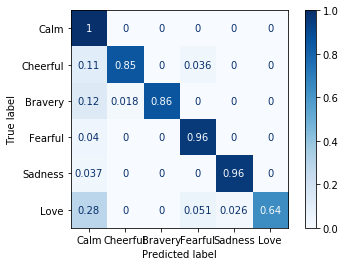

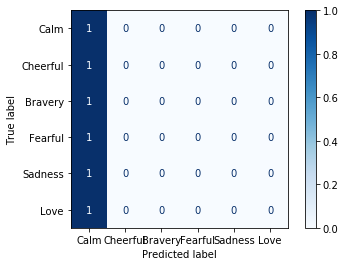

In [5]:
print_res("Vanilla",x_train,y_train,random_search_svm)
test_res("Vanilla",x_val,y_val,random_search_svm)

Best Score: 0.8707
shrinking => False
probability => False
kernel => rbf
gamma => 100.0
C => 1.0
Splits: 10
Random Oversampling Train Accuracy: 99.8667%
Random Oversampling Validation Accuracy: 19.05%


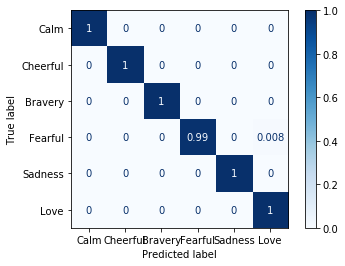

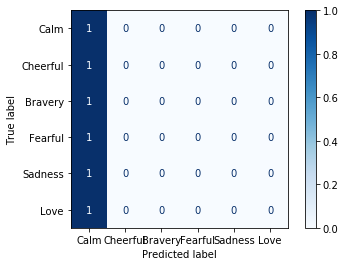

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_svm)
test_res("Random Oversampling",x_val,y_val,random_search_svm)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_svm)
test_res("SMOTE",x_val,y_val,random_search_svm)

In [ ]:
# LinearSVM, Randomized Search
k_folds = 10
random_search_iterations = 100
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-3, 2, 6), 
    'multi_class':['ovr', 'crammer_singer'], 
    'max_iter':[100, 150, 200]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

In [ ]:
print_res("Vanilla",x_train,y_train,random_search_linear)
test_res("Vanilla",x_val,y_val,random_search_linear)

In [ ]:
print_res("Random Oversampling",x_os,y_os,random_search_linear)
test_res("Random Oversampling",x_val,y_val,random_search_linear)

In [ ]:
print_res("SMOTE",x_smote,y_smote,random_search_linear)
test_res("SMOTE",x_val,y_val,random_search_linear)